In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
software_data_2017 = pd.read_csv("/project/biocomplexity/sdad/projects_data/ncses/bi/BERT_Consolidated_Methods/DNA_Software_Articles_2017_no_rep.csv")
diggy_predictions=pd.read_csv('/project/class/bii_sdad_dspg/uva_2021/binn/100k_articles_index_innovation_classification_prediction_diggy.csv')

In [3]:
company_list=pd.read_csv('/project/biocomplexity/sdad/projects_data/ncses/bi/DNA Data 2021/companies.csv')
company_list.code = company_list.code.str.lower()
company_list = company_list.rename(columns = {'code':'dna_code'})
company_list.drop_duplicates('dna_code', inplace = True)

In [4]:
merged_labeled_software_2017 = diggy_predictions.merge(software_data_2017, left_on='an', right_on='an') ## Merging diggy preds for innov or no innov
software_companies_2017 = merged_labeled_software_2017['company_codes_about'].str.split(',', expand=True).stack().value_counts() ## getting value counts of all companies
software_companies_2017=software_companies_2017.to_frame() ## converting to frame for neat view

software_companies_2017.reset_index(inplace=True)
software_companies_2017 = software_companies_2017.rename(columns = {'index':'dna_code'})
software_companies_2017 = software_companies_2017.rename(columns = {0:'All Mentions'})

In [5]:
merged_labeled_software_yes = merged_labeled_software_2017[merged_labeled_software_2017['pred_y']==1] ## Yes innov pred subset from pred
software_companies_2017_yes = merged_labeled_software_yes['company_codes_about'].str.split(',', expand=True).stack().value_counts()
software_companies_2017_yes=software_companies_2017_yes.to_frame()

software_companies_2017_yes.reset_index(inplace=True)
software_companies_2017_yes = software_companies_2017_yes.rename(columns = {'index':'dna_code'})
software_companies_2017_yes = software_companies_2017_yes.rename(columns = {0:'Innovative Mentions'})

In [54]:
data = software_companies_2017[1:].merge(software_companies_2017_yes[1:], on = "dna_code", how = "left")
data = data.merge(company_list, on='dna_code', how = 'left')
data['Non-Innovative Mentions'] = data["All Mentions"] - data["Innovative Mentions"]
data['pct_innov'] = data["Innovative Mentions"]/data["All Mentions"]
#data['percent'] = round((data["Innovative Mentions"]/data["All Mentions"])*100,2)
data.head(10)

,dna_code,All Mentions,Innovative Mentions,description,ticker,ticker_exchange,exchange,Non-Innovative Mentions,pct_innov
0,ibm,10185,588.0,International Business Machines Corp.,IBM28A,IBM28A:XNYS,XNYS,9597.0,0.057732
1,mcrost,5895,1887.0,Microsoft Corporation,MSFT33,MSFT33:XNYS,XNYS,4008.0,0.320102
2,fjfvpl,3473,673.0,Snap Inc,SNAP,SNAP:XNYS,XNYS,2800.0,0.193781
3,orcle,1906,448.0,Oracle Corporation,ORCL,ORCL:XSWX,XSWX,1458.0,0.235047
4,goog,1640,694.0,Alphabet Inc.,ABEA,ABEA:XETR,XETR,946.0,0.423171
5,onlnfr,1169,472.0,"Facebook, Inc.",FB,FB:XSWX,XSWX,697.0,0.403764
6,amzcom,1099,325.0,"Amazon.com, Inc.",AMZN,AMZN:XSGO,XSGO,774.0,0.295723
7,salesf,1032,287.0,Salesforce.com Inc,0QYJ,0QYJ:XLON,XLON,745.0,0.278101
8,applc,984,451.0,Apple Inc.,AAPLEUR,AAPLEUR:XSWX,XSWX,533.0,0.458333
9,zxamaz,947,372.0,"Amazon Web Services, Inc.",NaN,NaN,NaN,575.0,0.392819


In [ ]:
/project/class/bii_sdad_dspg/uva_2021/binn/

In [100]:
data.to_csv("/project/class/bii_sdad_dspg/uva_2021/binn/dynamic_company_innov_fig_data.csv")

In [7]:
publishers_2017 = merged_labeled_software_2017.publisher_name.value_counts()
publishers_2017 = publishers_2017.to_frame()

publishers_2017.reset_index(inplace=True)
publishers_2017 = publishers_2017.rename(columns = {'publisher_name':'Publisher: All Articles'})
publishers_2017.head(10)

,index,Publisher: All Articles
0,"NewsRX, LLC",29018
1,"Business Wire, Inc.",7173
2,Normans Media Ltd,5587
3,News Bites Pty Ltd (Europe),5475
4,"Dow Jones & Company, Inc.",4762
5,Thomson Reuters (Markets) LLC,3500
6,Athena Information Solutions Pvt. Ltd.,2796
7,"GlobeNewswire, Inc.",2693
8,"Gannett Co., Inc. - Newspaper Division",2260
9,"iCrowdNewswire, LLC",1897


In [8]:
publishers_2017_yes = merged_labeled_software_yes.publisher_name.value_counts()
publishers_2017_yes = publishers_2017_yes.to_frame()

publishers_2017_yes.reset_index(inplace=True)
publishers_2017_yes = publishers_2017_yes.rename(columns = {'publisher_name':'Publisher: Innovative Articles'})
publishers_2017_yes.head(10)

,index,Publisher: Innovative Articles
0,"NewsRX, LLC",4451
1,"Business Wire, Inc.",2520
2,Normans Media Ltd,2215
3,"Dow Jones & Company, Inc.",1318
4,"Gannett Co., Inc. - Newspaper Division",830
5,Athena Information Solutions Pvt. Ltd.,566
6,"GlobeNewswire, Inc.",548
7,Electronic News Publishing Ltd.,500
8,MediaPost Communications,458
9,CNET Networks Inc.,429


In [94]:
data_p = publishers_2017.merge(publishers_2017_yes, on = "index", how = "left")
data_p = data_p.rename(columns = {'index':'Publisher Name'})
data_p = data_p.fillna(0)
data_p['Publisher: Non-Innovative Articles'] = data_p["Publisher: All Articles"] - data_p["Publisher: Innovative Articles"]
data_p['pct_innov'] = data_p["Publisher: Innovative Articles"]/data_p["Publisher: All Articles"]
#data_p[['Publisher: All Articles','Publisher: Innovative Articles']] = data_p[['Publisher: All Articles','Publisher: Innovative Articles']].apply(pd.to_numeric)
#data_p['percent'] = round((data["Innovative Mentions"]/data["All Mentions"])*100,2)
data_p.head(10)

,Publisher Name,Publisher: All Articles,Publisher: Innovative Articles,Publisher: Non-Innovative Articles,pct_innov
0,"NewsRX, LLC",29018,4451.0,24567.0,0.153388
1,"Business Wire, Inc.",7173,2520.0,4653.0,0.351317
2,Normans Media Ltd,5587,2215.0,3372.0,0.396456
3,News Bites Pty Ltd (Europe),5475,0.0,5475.0,0.000000
4,"Dow Jones & Company, Inc.",4762,1318.0,3444.0,0.276774
5,Thomson Reuters (Markets) LLC,3500,220.0,3280.0,0.062857
6,Athena Information Solutions Pvt. Ltd.,2796,566.0,2230.0,0.202432
7,"GlobeNewswire, Inc.",2693,548.0,2145.0,0.203491
8,"Gannett Co., Inc. - Newspaper Division",2260,830.0,1430.0,0.367257
9,"iCrowdNewswire, LLC",1897,250.0,1647.0,0.131787


## Publisher Counts for 2017

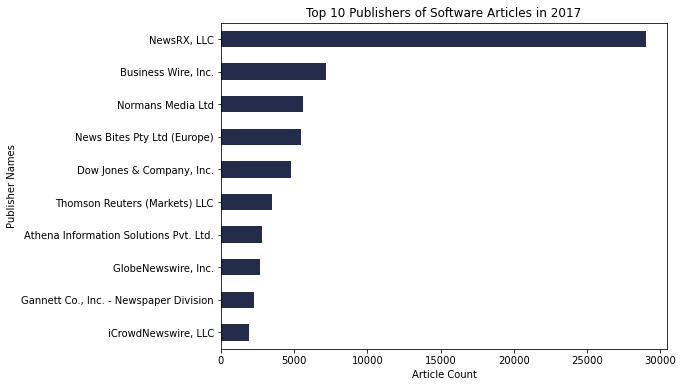

In [10]:
y = data_p.head(10).sort_values(by = "Publisher: All Articles", ascending = True).plot.barh(x='Publisher Name', y="Publisher: All Articles", rot=0, color = '#232D4B')
plt.title("Top 10 Publishers of Software Articles in 2017")
plt.ylabel('Publisher Names')
plt.xlabel('Article Count')
plt.legend().remove()
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/data_overview/2017_top_10_publishers.png'), dpi = 600, bbox_inches='tight')
plt.show()

## Company Mention Counts for 2017

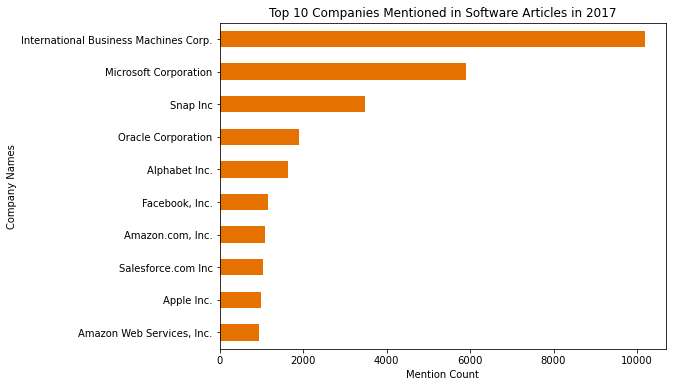

In [11]:
y = data.head(10).sort_values(by = "All Mentions", ascending = True).plot.barh(x=' description', y = "All Mentions", rot=0, color = "#E57200")
plt.title("Top 10 Companies Mentioned in Software Articles in 2017")
plt.ylabel('Company Names')
plt.xlabel('Mention Count')
plt.legend().remove()
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/data_overview/2017_top_10_company_mentions.png'), dpi = 600, bbox_inches='tight')
plt.show()

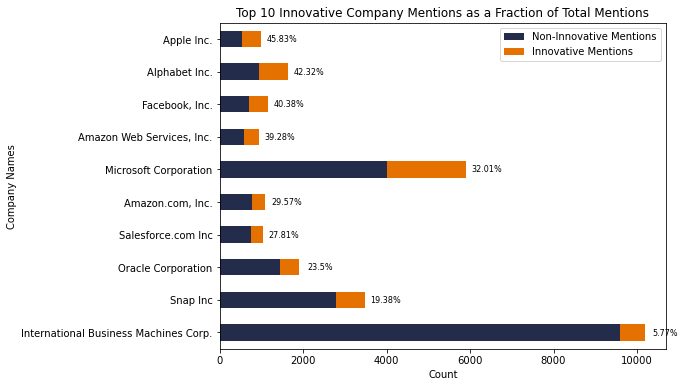

In [97]:
i = 0
ax = data.head(10).sort_values("pct_innov", ascending = True).plot.barh(x=' description', y = ["Non-Innovative Mentions", "Innovative Mentions"], rot=0, color = ['#232D4B', "#E57200"], stacked = True)
plt.title("Top 10 Innovative Company Mentions as a Fraction of Total Mentions")
plt.ylabel('Company Names')
plt.xlabel('Count')
for rect in ax.patches:
    while i == 10:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can used as the label
        label_text = str(round((width/(x+width))*100,2))+"%"  # f'{width:.2f}' if you have decimal values as labels

        label_x = x + width+500
        label_y = y + height/2
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        i=9
    
    if i < 10:
        i = i + 1
    
    elif i > 10:
        i = 10
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/classification/2017_top_10_innovative_companies_frac.png'), dpi = 600, bbox_inches='tight')
plt.show()

In [92]:
data_p.head(10)

,Publisher Name,Publisher: All Articles,Publisher: Innovative Articles,Publisher: Non-Innovative Articles
0,"NewsRX, LLC",29018,4451.0,24567.0
1,"Business Wire, Inc.",7173,2520.0,4653.0
2,Normans Media Ltd,5587,2215.0,3372.0
3,News Bites Pty Ltd (Europe),5475,0.0,5475.0
4,"Dow Jones & Company, Inc.",4762,1318.0,3444.0
5,Thomson Reuters (Markets) LLC,3500,220.0,3280.0
6,Athena Information Solutions Pvt. Ltd.,2796,566.0,2230.0
7,"GlobeNewswire, Inc.",2693,548.0,2145.0
8,"Gannett Co., Inc. - Newspaper Division",2260,830.0,1430.0
9,"iCrowdNewswire, LLC",1897,250.0,1647.0


<ipython-input-98-a02ee08485b8>:14: RuntimeWarning: invalid value encountered in double_scalars
  label_text = str(round((width/(x+width))*100,2))+"%"  # f'{width:.2f}' if you have decimal values as labels


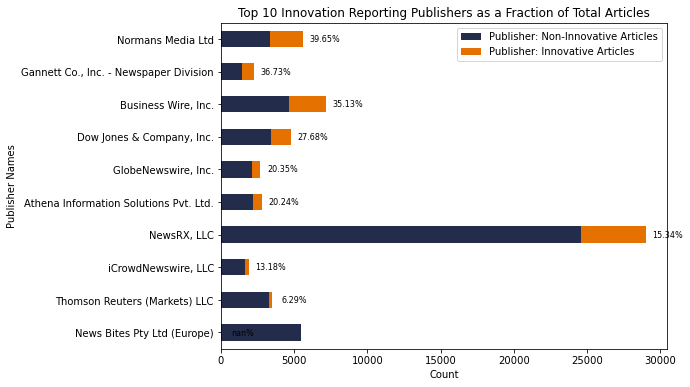

In [98]:
i = 0
ax = data_p.head(10).sort_values("pct_innov", ascending = True).plot.barh(x='Publisher Name', y = ["Publisher: Non-Innovative Articles", "Publisher: Innovative Articles"], rot=0, color = ['#232D4B', "#E57200"], stacked = True)
plt.title("Top 10 Innovation Reporting Publishers as a Fraction of Total Articles")
plt.ylabel('Publisher Names')
plt.xlabel('Count')
for rect in ax.patches:
    while i == 10:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can used as the label
        label_text = str(round((width/(x+width))*100,2))+"%"  # f'{width:.2f}' if you have decimal values as labels

        label_x = x + width+1500
        label_y = y + height/2
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        i=9
    
    if i < 10:
        i = i + 1
    
    elif i > 10:
        i = 10
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/classification/2017_top_10_publishers_frac.png'), dpi = 600, bbox_inches='tight')
plt.show()

In [250]:
total_2017_companies = len(software_companies_2017[1:])
total_innovative_companies_classified = len(software_companies_2017_yes[1:])
total_companies_no_innovation = total_2017_companies - total_innovative_companies_classified

In [251]:
total_2017_companies

11536

In [252]:
total_innovative_companies_classified

3926

In [253]:
total_companies_no_innovation

7610

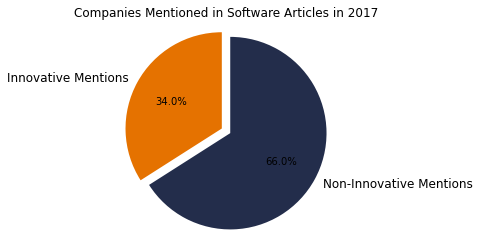

In [296]:
labels = ['Innovative Mentions', 'Non-Innovative Mentions']
sizes = [total_innovative_companies_classified, total_companies_no_innovation]
explode = (0.1, 0)
colors = ("#E57200", "#232D4B")
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14})
texts[0].set_fontsize(12)
texts[1].set_fontsize(12)
autotexts[0].set_fontsize(10)
autotexts[1].set_fontsize(10)
ax1.axis('equal')  
plt.title("Companies Mentioned in Software Articles in 2017")
plt.savefig(('/project/class/bii_sdad_dspg/uva_2021/binn/images/classification/2017_pie_innov_v_no-innov.png'), dpi = 600, bbox_inches='tight')
plt.show()